# Objective:

Segment customers using K-means clustering based on age, gender, purchase history, and other factors, and analyze customer behavior and preferences across different demographic groups (e.g., age groups and gender).

# Key Steps:
## 1. Load the Dataset and explore the features.
## 2. Data Preprocessing: Handle missing data, encode categorical variables, and standardize numerical features.
## 3. Clustering using K-means.
## 4. Visualize Clusters using PCA and explore insights based on different features like age, gender, canton, and purchase behavior.
## 5. Generate Graphs and derive insights for strategic decision-making.

# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Load dataset

In [3]:
data = pd.read_csv('/workspaces/swiss-data-science-demos-/customer_segmentation/data/customer_data.csv')


# Display dataset overview

In [4]:
print("Dataset Overview:")
print(data.info())
print(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        7000 non-null   int64 
 1   age                7000 non-null   int64 
 2   gender             7000 non-null   object
 3   purchase_history   7000 non-null   object
 4   average_spend      7000 non-null   int64 
 5   loyalty_score      7000 non-null   int64 
 6   preferred_channel  7000 non-null   object
 7   engagement_score   7000 non-null   int64 
 8   canton             7000 non-null   object
dtypes: int64(5), object(4)
memory usage: 492.3+ KB
None
       customer_id          age  average_spend  loyalty_score  \
count  7000.000000  7000.000000    7000.000000    7000.000000   
mean   3500.500000    44.335143     553.144286      49.981143   
std    2020.870275    15.265034     259.925149      29.322530   
min       1.000000    18.000000     100.00

# Check for missing values

In [5]:
print("Missing values:", data.isnull().sum())

Missing values: customer_id          0
age                  0
gender               0
purchase_history     0
average_spend        0
loyalty_score        0
preferred_channel    0
engagement_score     0
canton               0
dtype: int64


# Fill or drop missing values as needed

# Convert categorical features to numerical (e.g., Gender, Preferred Channel, Canton)


In [6]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['preferred_channel'] = label_encoder.fit_transform(data['preferred_channel'])
data['canton'] = label_encoder.fit_transform(data['canton'])


# Select features for clustering

In [13]:
X = data[['age', 'average_spend', 'loyalty_score', 'engagement_score']]


# Standardize features

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering


In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions using PCA for visualization

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize clusters in PCA space

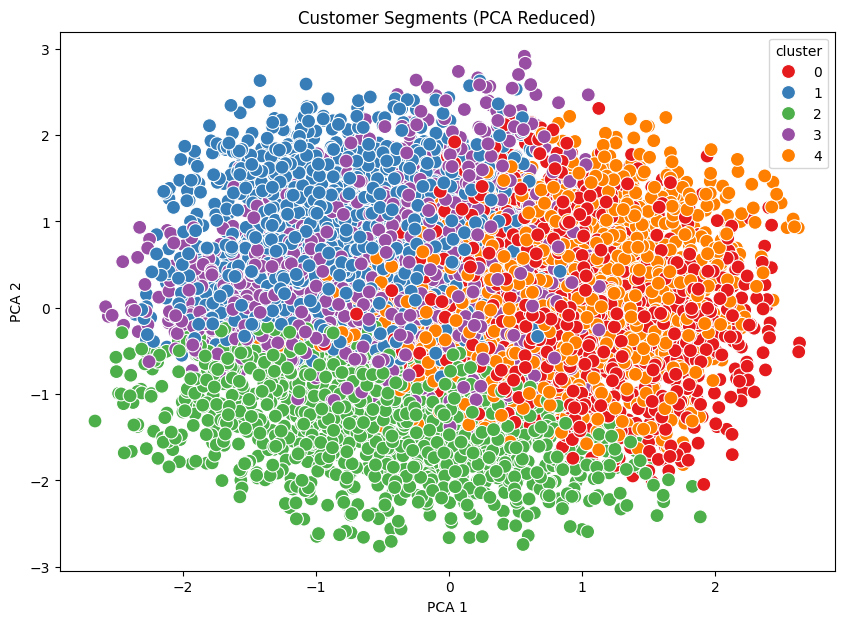

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['cluster'], palette='Set1', s=100)
plt.title('Customer Segments (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Display the head of the segmented data

In [18]:
print(data.head())


   customer_id  age  gender purchase_history  average_spend  loyalty_score  \
0            1   48       1      Electronics            411             33   
1            2   65       0          Fashion            168             72   
2            3   23       0           Travel            629             46   
3            4   39       0          Fashion            472              3   
4            5   20       1      Electronics            719             22   

   preferred_channel  engagement_score  canton age_group  cluster  
0                  1                31       4     40-49        2  
1                  0                42       5       60+        3  
2                  1                81       4     18-29        4  
3                  1                18       0     30-39        2  
4                  0                84       0     18-29        4  


# Plot Customer Distribution by Cluster

/tmp/ipykernel_44187/2137743686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='cluster', palette='coolwarm')


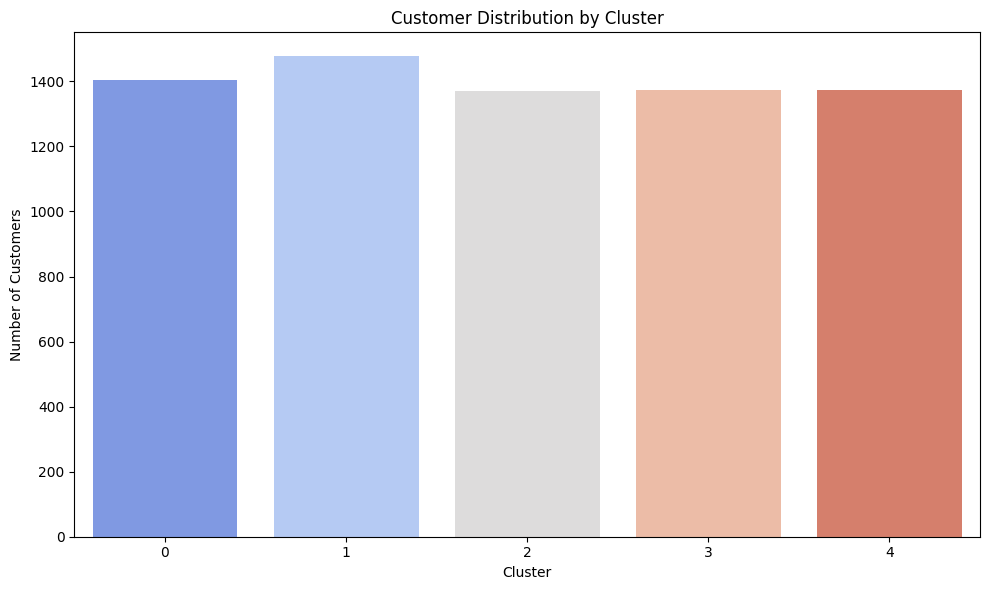

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cluster', palette='coolwarm')
plt.title('Customer Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Step 1: Visualize Insights by Age and Gender
1. Customer Distribution by Age Group

This plot shows the distribution of customers across different age groups.

# Create age groups for better visualization

In [20]:
bins = [18, 30, 40, 50, 60, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)


# Plot Customer Distribution by Age Group

/tmp/ipykernel_44187/3044980232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='age_group', palette='coolwarm')


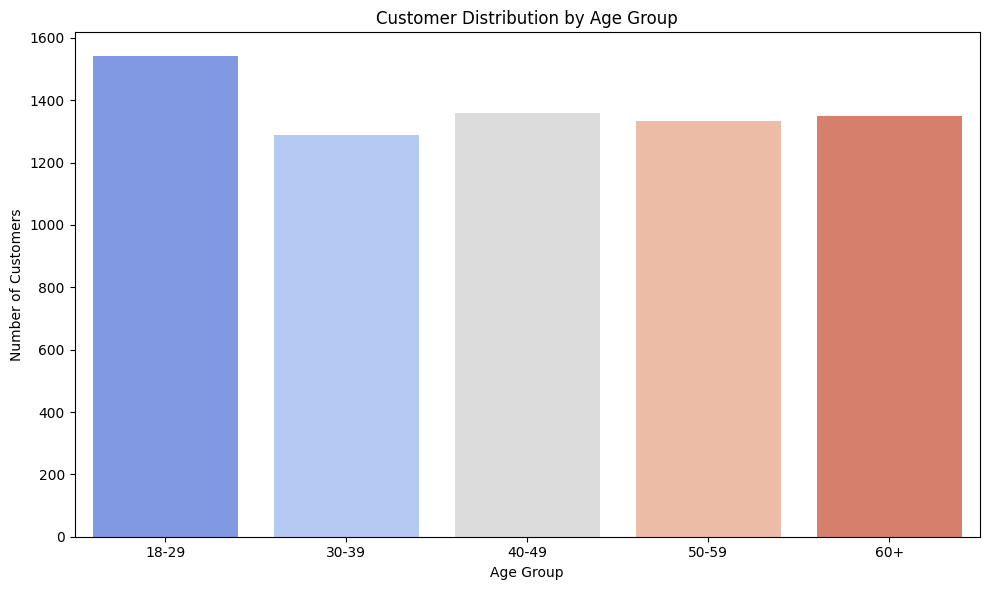

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', palette='coolwarm')
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

## 2. Average Spend by Age Group and Gender

Here, we visualize how average spending varies across different age groups and between genders

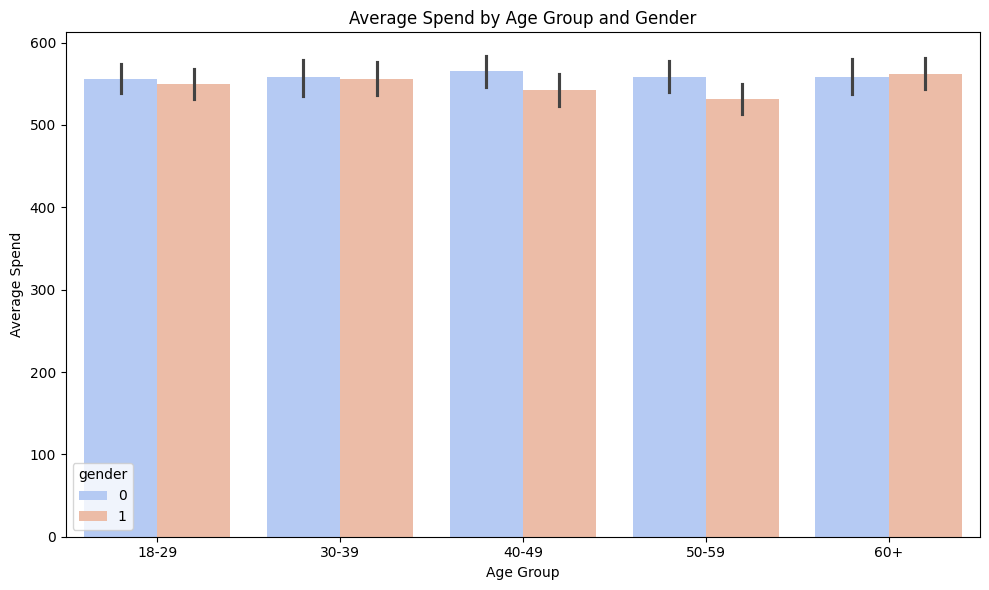

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='age_group', y='average_spend', hue='gender', palette='coolwarm')
plt.title('Average Spend by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Spend')
plt.tight_layout()
plt.show()

# Step 2: Explore Purchase History and Loyalty Score
## 3. Purchase History by Age Group

This plot shows how customers' purchase history varies by age group. It can help identify which age groups are more frequent shoppers.

/tmp/ipykernel_44187/843778340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='age_group', y='purchase_history', palette='coolwarm')


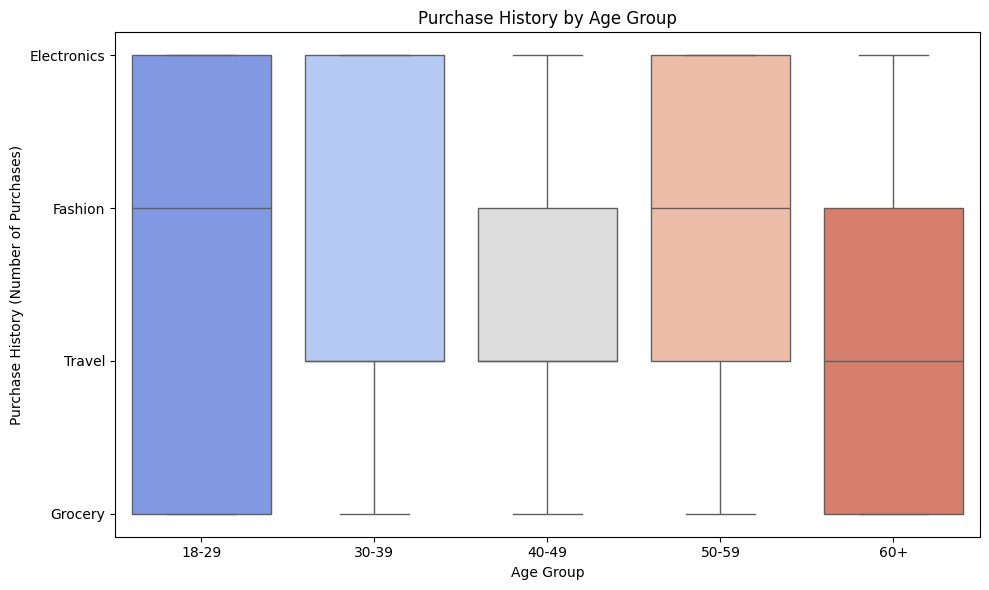

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='age_group', y='purchase_history', palette='coolwarm')
plt.title('Purchase History by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase History (Number of Purchases)')
plt.tight_layout()
plt.show()

## 4. Loyalty Score by Gender

This boxplot shows the loyalty score distribution by gender, which can help understand gender-based customer loyalty trends.

/tmp/ipykernel_44187/1541769218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='gender', y='loyalty_score', palette='coolwarm')


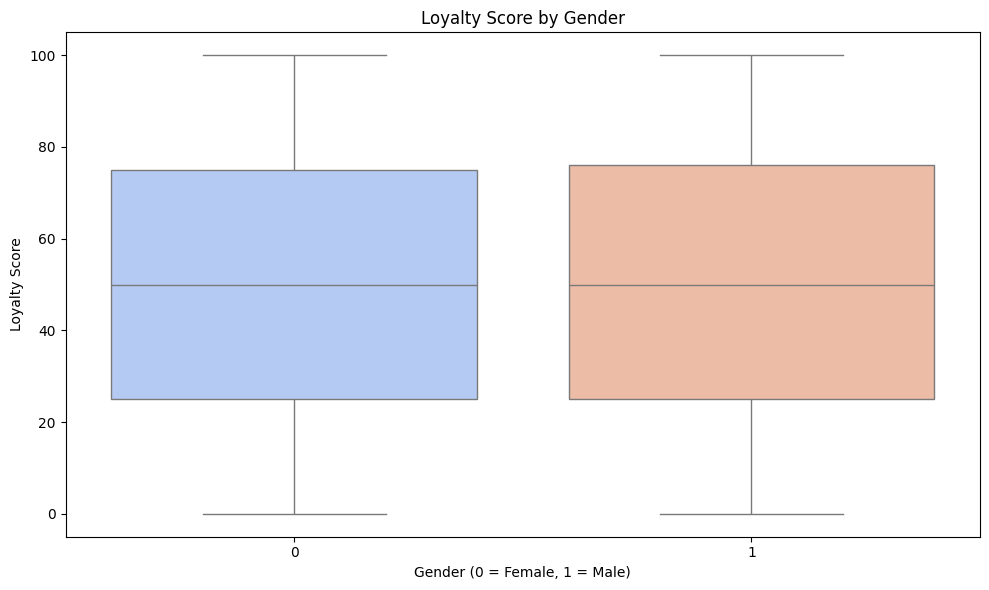

In [24]:
# Plot Loyalty Score by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='gender', y='loyalty_score', palette='coolwarm')
plt.title('Loyalty Score by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Loyalty Score')
plt.tight_layout()
plt.show()


# Step 3: Analyze Engagement Score and Preferred Channel
## 5. Engagement Score by Age Group

This graph shows how engaged customers are across different age groups.

/tmp/ipykernel_44187/1829260918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='age_group', y='engagement_score', palette='coolwarm')


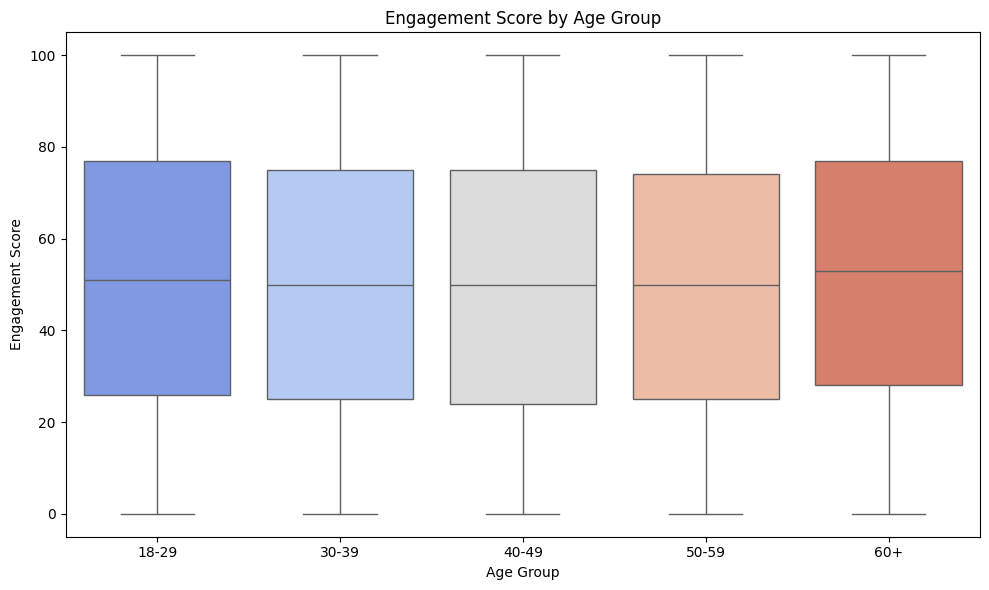

In [25]:
# Plot Engagement Score by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='age_group', y='engagement_score', palette='coolwarm')
plt.title('Engagement Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Engagement Score')
plt.tight_layout()
plt.show()


## 6. Preferred Channel by Age Group

Visualize which preferred channels (e.g., online, in-store) are most popular with different age groups.

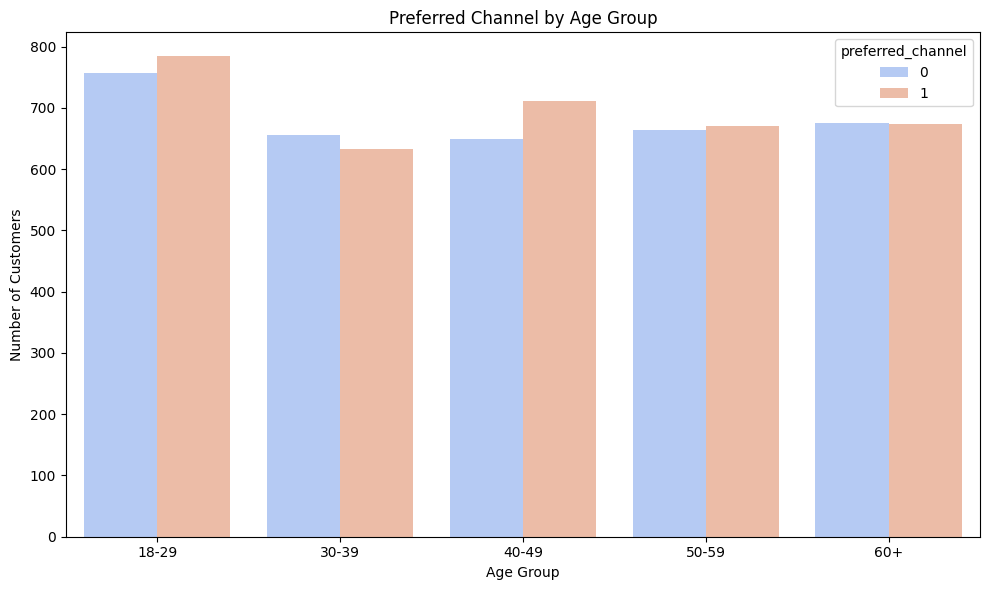

In [26]:
# Plot Preferred Channel by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='age_group', hue='preferred_channel', palette='coolwarm')
plt.title('Preferred Channel by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


# Step 4: Analyze Customer Segments by Canton
## 7. Cluster Distribution by Canton

Here, you analyze how the customer clusters are distributed across different cantons.



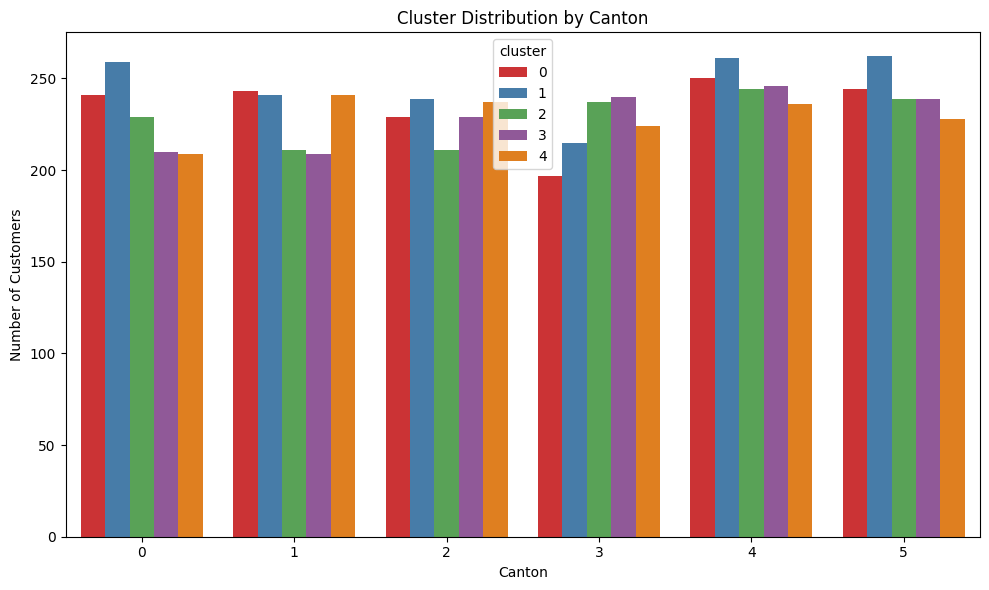

In [27]:
# Plot Cluster Distribution by Canton
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='canton', hue='cluster', palette='Set1')
plt.title('Cluster Distribution by Canton')
plt.xlabel('Canton')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


In [29]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv('/workspaces/swiss-data-science-demos-/customer_segmentation/data/customer_data.csv')

# Display dataset overview
print("Dataset Overview:")
print(data.info())
print(data.describe())

# Check for missing values
print("Missing values:", data.isnull().sum())



# Convert categorical features to numerical (e.g., Gender, Preferred Channel, Canton)
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['preferred_channel'] = label_encoder.fit_transform(data['preferred_channel'])
data['canton'] = label_encoder.fit_transform(data['canton'])

# Select features for clustering
features = ['age', 'gender', 'purchase_history', 'average_spend', 'loyalty_score', 'preferred_channel', 'engagement_score']
X = data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Reduce dimensions using PCA for visualization


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        7000 non-null   int64 
 1   age                7000 non-null   int64 
 2   gender             7000 non-null   object
 3   purchase_history   7000 non-null   object
 4   average_spend      7000 non-null   int64 
 5   loyalty_score      7000 non-null   int64 
 6   preferred_channel  7000 non-null   object
 7   engagement_score   7000 non-null   int64 
 8   canton             7000 non-null   object
dtypes: int64(5), object(4)
memory usage: 492.3+ KB
None
       customer_id          age  average_spend  loyalty_score  \
count  7000.000000  7000.000000    7000.000000    7000.000000   
mean   3500.500000    44.335143     553.144286      49.981143   
std    2020.870275    15.265034     259.925149      29.322530   
min       1.000000    18.000000     100.00

ValueError: could not convert string to float: 'Electronics'

Bad pipe message: %s [b'0.9,*/*;q=0.8\r\nHost: localhost:33733\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/60', b'1.15 (KHTML, like Gecko) Version/17.6 Safari/605.1.1']
Bad pipe message: %s [b'\nAccept-Encoding: gzip, deflate, br\r\nAccept-Language', b'en-GB,en;q=0.9\r\nReferer: https://zany-space-halibut-xx57p']
Bad pipe message: %s [b'wq73vrp4.github.dev/\r\nX-Request-ID: 97e97f7975bde694f9fc1319b40bc3e0\r\nX-Real-IP: 10.240.2.131\r\nX-Forwarde']
Bad pipe message: %s [b'Port: 443\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-Scheme: https\r\nsec-fetch-site: same-site', b'sec-fetch-de']
Bad pipe message: %s [b': document\r\nsec-fetch-mode: navigate\r\nX-Original-Proto: https\r\nX-Forwarded-Proto: https\r\nX-Forwarded-Host: zany-sp']
